**Universidade Federal do Pará**

**Programa pós Graduação Engenharia Elétrica**

**Redes Neurais Artificiais**


**Professora:** Prof. Dra. Adriana Castro

**Discentes:** Luan Santa (201900470003), Romário Silva (202000470023)

Trabalho 2 - Backpropagation - PPGEE
===

## Descrição

- [x] Implementar o algoritmo Backpropagation padrão em qualquer linguagem.
- [x] Apresentar gráfico de evolução do erro médio quadrático ao longo das iterações/épocas
- [x] Apresentar gráfico no final de treinamento com saída desejada versus saída da rede neural.
- [x] Algoritmo deve possibilitar variar número de neurônios na camada escondida (usar apenas uma camada escondida)
- [x] Possibilidade de verificar valores dos pesos sinápticos após finalização do treinamento.
- [x] No dia da entrega do trabalho a equipe deverá apresentar o algoritmo funcionando(via reunião no Teams),sendo que algumas perguntas à respeito do algoritmo serão direcionadas aos alunos.
- [x] Deverá ser entregue um relatório com código do algoritmo e resultados de treinamento para um caso de aplicação simples escolhido pela equipe.

Relatório
===

Neste relatório consta o código funcional da rede neural multi layer perceptron, de uma única camada intermediária, desenvolvido para a disciplina de redes neurais artificiais como segundo método avaliativo. Assim como, a comparação entre a biblioteca de rede MLP desenvolvida e uma biblioteca utilizada no ambiente de negócios (scikit-learn).


Ambiente de Desenvolvimento
---

Aqui é feita a configuração do ambiente de desenvolvimento Jupyter notebook. Onde as dependências são instaladas e os *warning* estão sendo desativados.

In [1]:
!pip install ipynb > /dev/null
import warnings
warnings.filterwarnings('ignore')

## Aplicação

Esta aplicação consiste na coleta do dataset, pré processamento dos dados (padronização), aplicação de duas redes neurais MLP e apresentação dos resultados.

### Cabeçalho

Todas as bibliotecas necessárias a aplicação serão carregadas no sistema.

In [2]:
# dataset
from sklearn.datasets import load_breast_cancer

# preprocessamento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# mlps
from sklearn.neural_network import MLPClassifier
from ipynb.fs.full.lib_ppgee_mlp import *

# Calculo das métricas avaliativas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, f1_score

### Carregamento do dataset

Os dados utilizado no estudo corresponde ao conjunto de dados utilizados para classificação de câncer de mama no estado de Wisconsin. 

- Classes: 2
- Amostras por classe: 212(Maligno), 357(Benigno)
- Total de Amostras: 569
- Atributos: 30
- Valores: Real e positivo

Disponível no repositório UCI: [link](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))

O dataset será separado em treinamento e teste, onde o 75\% será para treinamento e o restante para teste.

In [3]:
# carrega o dataset
cancer = load_breast_cancer()

# separa entre entrada(x) e saida(y)
X = cancer['data']
y = cancer['target']

# separa em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Pré-processamento

Nessa etapa é realizada a padronização dos dados utilizando o *StandardScaler*, responsável em remover a média do vetor e dividir pela variância. Dessa forma, os dados de entrada, *X_train* e *X_test*, na rede MLP serão padronizados.

$$ z=\frac{x-u}{v} $$

onde

$$ x=atributo;m=media;v=variancia $$

In [4]:
# Cria um padronizador
scaler = StandardScaler()

# Realiza os calculos de media e variancia
scaler.fit(X_train)

# Aplica a transformacao aos dados
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Inicialização das Redes MLP (Scikit learn e PPGEE)


Como método de validação, foi implementado uma rede neural MLP utilizando a biblioteca scikit learn e uma utilizando a biblioteca desenvolvida para a disciplina.

**Rede Neural MLP - Scikit Learn**

In [5]:
# Criacao da rede com todos os parametros necessarios
skl_mlp = MLPClassifier(
    activation='logistic', 
    learning_rate_init=0.4, 
    hidden_layer_sizes=(30))

# Treinamento da rede criada
skl_mlp.fit(X_train,y_train);

**Rede Neural MLP - PPGEE**

A biblioteca da rede MLP desenvolvida está presente no Apêndice 1, do documento.

In [6]:
# Adaptando a entrada e saída a nossa biblioteca
X = X_train
y = np.array([[c] for c in y_train])

# Configuracao da rede
layers = [30,30,1]
epochs = 10000        
eta = 0.4

# # Criacao da rede com todos os parametros necessarios
ppgee_mlp = Neural_Network(layers=layers, epochs=epochs, eta=eta)

# Treinamento da rede criada
ppgee_mlp.train(X, y)

### Resultados



São apresentados os gráficos de evolução do erro médio quadrático durante as 200 épocas, nos dois modelos de rede MLP e então, são apresentados os gráficos de evolução da rede.

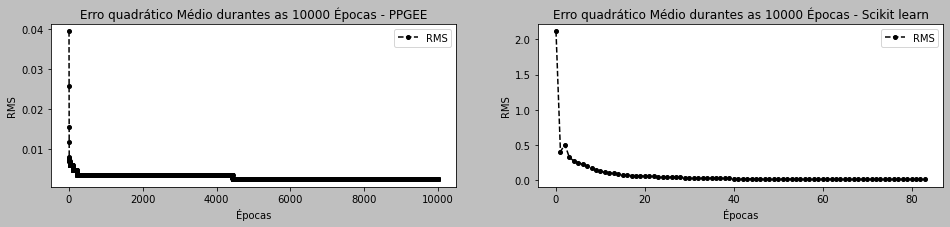

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(16,3))

ax[0].set_title(f"Erro quadrático Médio durantes as {epochs} Épocas - PPGEE")
ax[0].set_xlabel("Épocas")
ax[0].set_ylabel("RMS")
ax[0].plot(ppgee_mlp.get_rms(), linestyle='--', marker='o', markersize = 4)
ax[0].legend(['RMS'])

ax[1].set_title(f"Erro quadrático Médio durantes as {epochs} Épocas - Scikit learn")
ax[1].set_xlabel("Épocas")
ax[1].set_ylabel("RMS")
ax[1].plot(skl_mlp.loss_curve_, linestyle='--', marker='o', markersize = 4)
ax[1].legend(['RMS'])

Também é apresentado o gráfico comparativo entre saída desejada versus saída da rede. Foram gerados 4 gráficos, sendo os dois superiores, gráficos com dados de testes aplicados as duas redes MLP, e os dois inferiores gráficos com dados de treinamento.

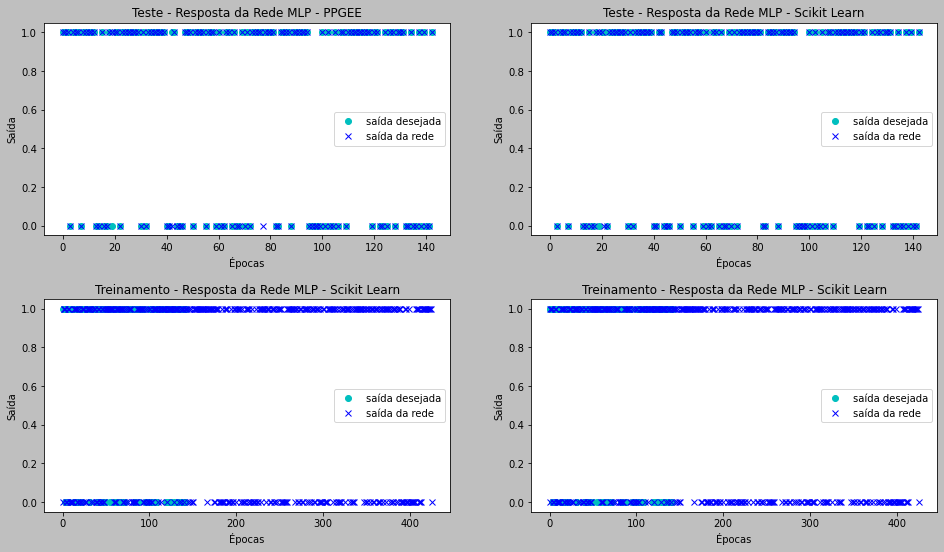

In [8]:
ppgee_predictions = np.round(ppgee_mlp.forward(X_test))
skl_predictions = skl_mlp.predict(X_test)

fig, ax = plt.subplots(2, 2, figsize=(16,9))
fig.subplots_adjust(hspace=0.3)
ax[0][0].plot(y_test, 'o', color='c', label="saída desejada")
ax[0][0].set_title("Teste - Resposta da Rede MLP - PPGEE")
ax[0][0].set_xlabel("Épocas")
ax[0][0].set_ylabel("Saída")
ax[0][0].plot(ppgee_predictions, 'x', color='b', label='saída da rede')
ax[0][0].legend()

ax[0][1].plot(y_test, 'o', color='c', label="saída desejada")
ax[0][1].set_title("Teste - Resposta da Rede MLP - Scikit Learn")
ax[0][1].set_xlabel("Épocas")
ax[0][1].set_ylabel("Saída")
ax[0][1].plot(skl_predictions, 'x', color='b',  label='saída da rede')
ax[0][1].legend()

ppgee_predictions = np.round(ppgee_mlp.forward(X_train))
skl_predictions = skl_mlp.predict(X_train)

ax[1][0].plot(y_test, 'o', color='c', label="saída desejada")
ax[1][0].set_title("Treinamento - Resposta da Rede MLP - Scikit Learn")
ax[1][0].set_xlabel("Épocas")
ax[1][0].set_ylabel("Saída")
ax[1][0].plot(skl_predictions, 'x', color='b', label='saída da rede')
ax[1][0].legend()

ax[1][1].plot(y_test, 'o', color='c', label="saída desejada")
ax[1][1].set_title("Treinamento - Resposta da Rede MLP - Scikit Learn")
ax[1][1].set_xlabel("Épocas")
ax[1][1].set_ylabel("Saída")
ax[1][1].plot(skl_predictions, 'x', color='b', label='saída da rede')
ax[1][1].legend()

### Métricas avaliativas da Rede

Neste tópico, é feito a comparação entre as duas redes MLP (scikit learn e PPGEE) utilizando as métricas accuracy, precision e f1 score.

In [9]:
ppgee_predictions = np.round(ppgee_mlp.forward(X_test))
skl_predictions = skl_mlp.predict(X_test)

# tn, fp, fn, tp
matrix_confusion = confusion_matrix(y_test,skl_predictions).ravel()
print(f"Matriz de confusão( vn,fp, fn, vp ): {matrix_confusion}")

print(f"Acurácia: {accuracy_score(y_test,skl_predictions)}")
print(f"Precisão: {precision_score(y_test,skl_predictions)}")
print(f"F1 Score: {f1_score(y_test,skl_predictions)}")

Matriz de confusão( vn,fp, fn, vp ): [49  1  1 92]
Acurácia: 0.986013986013986
Precisão: 0.989247311827957
F1 Score: 0.989247311827957


In [10]:
# tn, fp, fn, tp
matrix_confusion = confusion_matrix(y_test,ppgee_predictions).ravel()
print(f"Matriz de confusão( vn,fp, fn, vp ): {matrix_confusion}")

print(f"Acurácia: {accuracy_score(y_test,ppgee_predictions)}")
print(f"Precisão: {precision_score(y_test,ppgee_predictions)}")
print(f"F1 Score: {f1_score(y_test,ppgee_predictions)}")

Matriz de confusão( vn,fp, fn, vp ): [49  1  2 91]
Acurácia: 0.9790209790209791
Precisão: 0.9891304347826086
F1 Score: 0.9837837837837837


### Pesos da Rede

Por fim, os pesos atualizados são salvos em dois arquivos:

- Entrada --> Oculta: w1.txt

- Oculta --> Saída: w2.txt

In [11]:
ppgee_mlp.saveWeights()

## Conclusão

O algoritmo desenvolvido para a disciplina mostra-se eficiênte pois é visível a aprendizagem ao analisarmos a evolução do erro quadrático médio. Assim como as métricas de acurácia, precisão, F1 Score e matriz de confusão, mostra que a rede desenvolvida pode ser aplicada em ambientes que aceitem estas métricas, ficando responsável ao especialista da área da saúde definir a aceitabilidade dos dados. Por fim, a comparação entre aplicações mostra-se como um método eficiênte para validação do algoritmo, onde o algoritmo desenvolvido para a disciplina, em alguns casos obtém uma taxa de acerto superior ao da biblioteca, considerando as configurações apresentadas.